In [2]:
import os
import json
import pandas as pd
import numpy as np
import tqdm
import scipy.sparse as sp

from pprint import pprint
from collections import defaultdict

DATA_PATH = 'D:\download'
with open(os.path.join(DATA_PATH, 'test_users.json'), 'r') as f:
    test_users = set(json.load(f)['users'])
    
transactions = pd.read_csv(
    os.path.join(DATA_PATH, 'transactions.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'consumption_mode': 'category',
        'ts': np.float64,
        'watched_time': np.uint64,
        'device_type': np.uint8,
        'device_manufacturer': np.uint8
    })

In [114]:
with open(os.path.join(DATA_PATH, 'test_users.json'), 'r') as f:
    test_users = set(json.load(f)['users'])

In [115]:
%%time
bookmarks = pd.read_csv(
    os.path.join(DATA_PATH, 'bookmarks.csv'),
    dtype={
        'element_uid': np.uint16,
        'user_uid': np.uint32,
        'ts': np.float64
    }
)
bookmarks.head()
from collections import Counter

Wall time: 388 ms


In [4]:
bookmarks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948216 entries, 0 to 948215
Data columns (total 3 columns):
user_uid       948216 non-null uint32
element_uid    948216 non-null uint16
ts             948216 non-null float64
dtypes: float64(1), uint16(1), uint32(1)
memory usage: 12.7 MB


In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9643012 entries, 0 to 9643011
Data columns (total 7 columns):
element_uid            uint16
user_uid               uint32
consumption_mode       category
ts                     float64
watched_time           uint64
device_type            uint8
device_manufacturer    uint8
dtypes: category(1), float64(1), uint16(1), uint32(1), uint64(1), uint8(2)
memory usage: 229.9 MB


In [6]:
transactions=transactions.drop(['consumption_mode', 'ts', 'watched_time', 'device_type', 'device_manufacturer'], 1)

In [7]:
transactions['seen']=1

In [8]:
transactions.head()

,element_uid,user_uid,seen
0,3336,5177,1
1,481,593316,1
2,4128,262355,1
3,6272,74296,1
4,5543,340623,1


In [11]:
book_exp=pd.merge(transactions, bookmarks, on=['element_uid', 'user_uid'])

In [14]:
book_exp1

,user_uid,element_uid,ts_x,seen,ts_y
0,301135,7185,4.430516e+07,0.0,0.000000e+00
1,301135,4083,4.430516e+07,0.0,0.000000e+00
2,301135,10158,4.430516e+07,0.0,0.000000e+00
3,301135,2693,4.430516e+07,0.0,0.000000e+00
4,301135,2181,4.430515e+07,0.0,0.000000e+00
5,301135,7190,4.430515e+07,0.0,0.000000e+00
6,301135,905,4.430515e+07,0.0,0.000000e+00
7,301135,6976,4.430515e+07,0.0,0.000000e+00
8,301135,6170,4.430515e+07,0.0,0.000000e+00
9,301135,8404,4.430515e+07,0.0,0.000000e+00


In [15]:
Counter(book_exp1.seen)

Counter({0.0: 683494, 1.0: 264722})

In [12]:
book_exp1=pd.merge(bookmarks, book_exp,how='left', on=['element_uid', 'user_uid'])

In [13]:
book_exp1.fillna(0, inplace=True)

In [16]:
book_exp1['summ']=book_exp1.user_uid.map(book_exp1.groupby('user_uid').seen.sum())

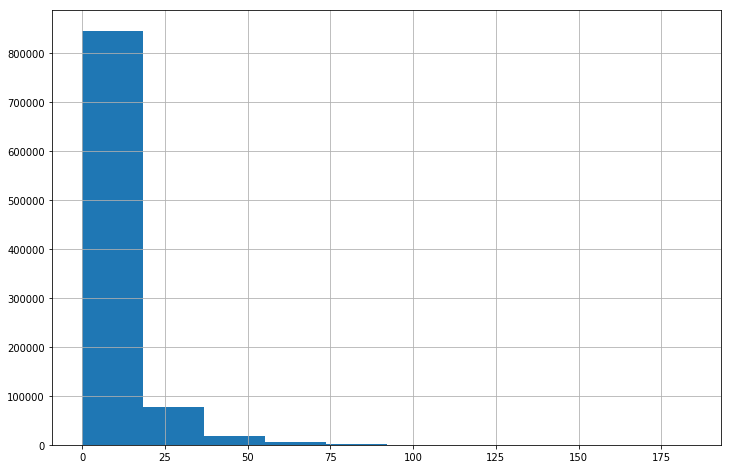

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.hist(book_exp1.summ)
plt.grid()
plt.show()

In [17]:
#book_exp1=book_exp1.drop(['sum'],1)
book_exp1['zeros']=book_exp1.seen.map(lambda x: 1 if x == 0 else 0)
book_exp1['summzeros']=book_exp1.user_uid.map(book_exp1.groupby('user_uid').zeros.sum())


In [91]:
book=book_exp1[book_exp1.summ != 0][book_exp1.summzeros !=0]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [92]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770782 entries, 22 to 948215
Data columns (total 8 columns):
user_uid       770782 non-null uint32
element_uid    770782 non-null uint16
ts_x           770782 non-null float64
seen           770782 non-null float64
ts_y           770782 non-null float64
summ           770782 non-null float64
zeros          770782 non-null int64
summzeros      770782 non-null int64
dtypes: float64(4), int64(2), uint16(1), uint32(1)
memory usage: 45.6 MB


In [93]:
book1=book_exp1[book_exp1.summ == 0]
book1=book1[book1.summzeros < 6]
book1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95230 entries, 35 to 948203
Data columns (total 8 columns):
user_uid       95230 non-null uint32
element_uid    95230 non-null uint16
ts_x           95230 non-null float64
seen           95230 non-null float64
ts_y           95230 non-null float64
summ           95230 non-null float64
zeros          95230 non-null int64
summzeros      95230 non-null int64
dtypes: float64(4), int64(2), uint16(1), uint32(1)
memory usage: 5.6 MB


In [63]:
book1.head()

,user_uid,element_uid,ts_x,seen,ts_y,summ,zeros,summzeros
35,267676,8264,4.430474e+07,0.0,0.0,0.0,1,3
37,328216,3612,4.430470e+07,0.0,0.0,0.0,1,1
47,263062,916,4.430451e+07,0.0,0.0,0.0,1,1
52,91125,2213,4.430442e+07,0.0,0.0,0.0,1,1
72,549015,1242,4.430429e+07,0.0,0.0,0.0,1,4


In [94]:
book['percentwatched']=((book_exp1['summ'])/(book_exp1['summzeros']))*100

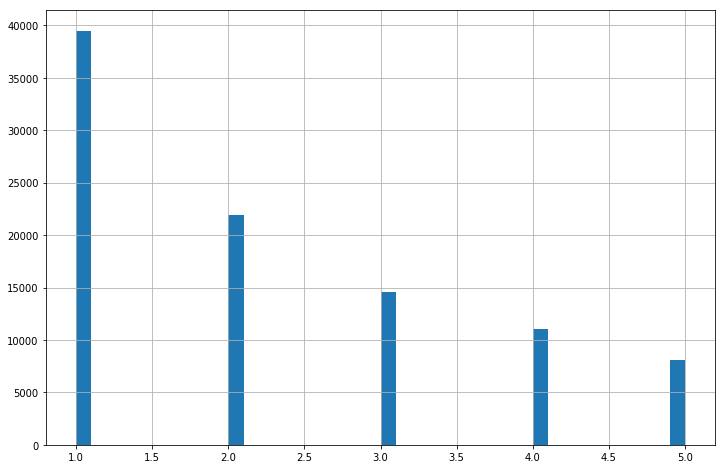

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.hist(book1.summzeros,40)
plt.grid()
plt.show()

In [95]:
G1=book[book.percentwatched >59]

In [96]:
G1=G1[G1.summzeros>0][G1.summzeros<9]

In [97]:
G1.head()

,user_uid,element_uid,ts_x,seen,ts_y,summ,zeros,summzeros,percentwatched
27,216493,38,4.430488e+07,0.0,0.0,5.0,1,1,500.000000
31,358123,5396,4.430483e+07,0.0,0.0,7.0,1,4,175.000000
32,549586,8072,4.430481e+07,0.0,0.0,4.0,1,6,66.666667
33,549586,6656,4.430480e+07,0.0,0.0,4.0,1,6,66.666667
38,276497,5445,4.430470e+07,0.0,0.0,4.0,1,5,80.000000


In [98]:
G1=G1.append(book1)

In [99]:
len(pd.unique(G1.user_uid))

83813

In [100]:
len(pd.unique(book1.user_uid))

59734

In [89]:
book_exp1[book_exp1.user_uid==59728]

,user_uid,element_uid,ts_x,seen,ts_y,summ,zeros,summzeros,percentwatched
883,59728,6236,4.430213e+07,1.0,4.430213e+07,2.0,0,1,150.0
904,59728,8374,4.430210e+07,1.0,4.430210e+07,2.0,0,1,150.0
3455,59728,2910,4.429363e+07,0.0,0.000000e+00,2.0,1,1,150.0


In [101]:
seen=G1[G1.seen == 1]
notseen=G1[G1.seen == 0]

In [102]:
seen=seen.drop(['ts_x', 'ts_y', 'seen'], 1)
notseen=notseen.drop(['ts_x','ts_y', 'seen'], 1)

In [103]:
unique=pd.unique(seen.user_uid)

In [104]:
unique1=pd.unique(notseen.user_uid)

In [105]:
book_elements = defaultdict(set)
for user_uid,element_uid in (notseen.loc[:, ['user_uid', 'element_uid']].values):
    if user_uid in unique:
        if user_uid in test_users:
            book_elements[user_uid].add(element_uid) 

In [106]:
bk=pd.DataFrame.from_dict(book_elements, orient='index')

In [84]:
bk

,0,1,2,3,4,5,6,7
121983,6533,4971.0,8652.0,6955.0,8494.0,4252.0,4796.0,NaN
418892,6656,8460.0,9037.0,5554.0,9844.0,4373.0,2043.0,NaN
42322,2557,153.0,1653.0,NaN,NaN,NaN,NaN,NaN
415948,8330,8420.0,NaN,NaN,NaN,NaN,NaN,NaN
398628,8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72789,1090,9540.0,6471.0,3722.0,6126.0,2357.0,NaN,NaN
454547,9057,2949.0,3045.0,4972.0,2447.0,5488.0,8530.0,603.0
23773,8137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362534,7522,4525.0,NaN,NaN,NaN,NaN,NaN,NaN
486731,1650,8436.0,2293.0,7190.0,9341.0,NaN,NaN,NaN


In [140]:
bk=bk.transpose()

In [124]:
x = {'a':1, 'b': 2}
y = {'b':10, 'c': 11}
z = x.update(y)
print(z)

print(x)


None
{'a': 1, 'b': 10, 'c': 11}


In [107]:
result={}
for user_uid in bk.index:
    result[user_uid] = bk.loc[user_uid].dropna().astype(int).values.tolist()

In [108]:
result

{121983: [6533, 4971, 8652, 6955, 8494, 4252, 4796],
 418892: [6656, 8460, 9037, 5554, 9844, 4373, 2043],
 42322: [2557, 153, 1653],
 415948: [8330, 8420],
 398628: [8739],
 72789: [1090, 9540, 6471, 3722, 6126, 2357],
 454547: [9057, 2949, 3045, 4972, 2447, 5488, 8530, 603],
 172210: [6627, 7047, 6889, 2323, 6687],
 23773: [8137],
 545: [9025, 1227, 9932, 2510, 1653, 6585, 10171],
 362534: [7522, 4525],
 486731: [1650, 8436, 2293, 7190, 9341],
 331095: [6213, 6726, 9836, 4493, 2702, 1519],
 372875: [4591],
 577486: [5921, 2278],
 533187: [6436, 6213, 3877, 2138, 3376, 4915, 3188, 2650],
 510765: [2694, 8647, 905, 4366, 2327, 5656, 1017, 4925],
 398114: [4369, 1017, 2054],
 216043: [5057, 2152, 361, 2923, 9939, 7381, 474],
 461244: [6985, 1490],
 474687: [10108],
 385588: [7360, 6146, 3336, 8713, 6505, 4814, 9744, 849],
 184247: [5592, 27, 2287],
 428008: [3137, 9540, 8021, 294],
 163981: [5616, 6214],
 294763: [7360, 1570, 7913, 9077, 1241],
 365048: [8195, 9391, 6513, 6291, 533, 889]

In [109]:
with open('bookres(G1)4.0.json', 'w') as f:
    json.dump(result, f)

In [117]:
with open(os.path.join( 'WORST1(BASE)cube(dont_rec_rating).json'), 'r') as f:
    answ = (json.load(f))
with open(os.path.join( 'bookres(G1)4.0.json'), 'r') as f:
    book = (json.load(f))

In [5]:


with open(os.path.join( 'WORST1(BASE).json'), 'r') as f:
    book = (json.load(f))
len(book)

49913

In [118]:
answ

{'0': [3230,
  1636,
  9472,
  10061,
  4141,
  3757,
  7079,
  283,
  9089,
  1004,
  427,
  905,
  1681,
  1326,
  7449,
  2030,
  3916,
  2714,
  5405,
  102],
 '131072': [6127,
  905,
  1016,
  7079,
  1004,
  5035,
  3916,
  1577,
  2360,
  2714,
  3757,
  3783,
  4171,
  8436,
  9491,
  5623,
  4290,
  1227,
  747,
  8647],
 '2': [2714,
  3336,
  4141,
  6195,
  1521,
  3916,
  2245,
  6209,
  3452,
  1016,
  6127,
  10061,
  7079,
  3782,
  71,
  6377,
  813,
  153,
  549,
  9107],
 '262145': [4441,
  3045,
  546,
  9179,
  6409,
  5554,
  6213,
  10061,
  3336,
  229,
  6127,
  6195,
  3856,
  2245,
  1521,
  1570,
  1016,
  813,
  9406,
  8771],
 '524291': [3567,
  5644,
  5405,
  8215,
  72,
  7233,
  9089,
  427,
  8501,
  3256,
  1681,
  9430,
  4519,
  57,
  2639,
  4096,
  6377,
  1349,
  3250,
  102],
 '131077': [72,
  3230,
  9472,
  5644,
  8215,
  427,
  3947,
  51,
  540,
  3256,
  8501,
  1636,
  5405,
  57,
  793,
  9089,
  7636,
  1349,
  3275,
  2659],
 '6': [378

In [125]:
book

{'42322': [2557, 153, 1653],
 '415948': [8330, 8420],
 '398628': [8739],
 '23773': [8137],
 '362534': [7522, 4525],
 '372875': [4591],
 '577486': [5921, 2278],
 '398114': [4369, 1017, 2054],
 '461244': [6985, 1490],
 '474687': [10108],
 '184247': [5592, 27, 2287],
 '163981': [5616, 6214],
 '220800': [5680, 1695],
 '59728': [2910],
 '145276': [7844, 4363, 6860],
 '329189': [1149],
 '96919': [3024],
 '197908': [5022],
 '492344': [5798],
 '276272': [3587, 725],
 '96950': [10018, 6111],
 '565609': [3353],
 '364955': [2138, 7774, 3783],
 '291629': [9179],
 '40211': [6862],
 '77869': [5895],
 '309173': [10060, 6236],
 '515101': [6950],
 '321514': [6594],
 '268617': [1413],
 '184692': [7777],
 '187763': [5644],
 '125959': [9566, 7079],
 '271659': [5208, 9677],
 '270192': [7191],
 '359364': [8420],
 '231280': [9077],
 '95398': [2332, 205, 3575],
 '434893': [3045],
 '493223': [1323],
 '403469': [2696, 9298, 2974],
 '146856': [5840],
 '409133': [4606],
 '568500': [3189],
 '351923': [6784, 9179, 

In [120]:
with open('answ(book_upgradeG1)4.0_dont_rec_rate.json', 'w') as f:
    json.dump(answ, f)

In [40]:
len(answ)

49913

In [119]:
bl=list(book.keys())
i=0
for key in bl:

    answ1=book.get('{}'.format(key))



    if len(answ1)==20:
        dct0={'{}'.format(key) : answ1}
        z=answ.update(dct0)
    else:
        answ2=answ.get('{}'.format(key))
        
        if answ2 == None:
            dct0={'{}'.format(key) : answ1}
            z=answ.update(dct0)
        else:
            x=20-len(answ1)
            answ3=answ2[:x]
            answ3=answ1+answ3
            dct0={'{}'.format(key) : answ3}
            z=answ.update(dct0)


In [154]:
t=answ.get('89868')
print(t)
tt=book.get('89868')
print(tt)
print('         ')
ttt=t[:14]
ttt=ttt+tt
print(ttt)

[7931, 6656, 2639, 1935, 8127, 9633, 5616, 3911, 2531, 3916, 143, 1004, 9077, 7079, 2138, 2014, 5368, 3045, 6409, 9657]
[3969, 229, 230, 6890, 45, 8634, 6236, 1533, 7839]
         
[7931, 6656, 2639, 1935, 8127, 9633, 5616, 3911, 2531, 3916, 143, 1004, 9077, 7079, 3969, 229, 230, 6890, 45, 8634, 6236, 1533, 7839]


In [157]:
t=answ.get('89868')
print(t)
tt=book.get('89868')
print(tt)

[7931, 6656, 2639, 1935, 8127, 9633, 5616, 3911, 2531, 3916, 143, 3969, 229, 230, 6890, 45, 8634, 6236, 1533, 7839]
[3969, 229, 230, 6890, 45, 8634, 6236, 1533, 7839]


In [147]:
t.append(tt)

In [149]:
t+tt

[7931,
 6656,
 2639,
 1935,
 8127,
 9633,
 5616,
 3911,
 2531,
 3916,
 143,
 1004,
 9077,
 7079,
 2138,
 2014,
 5368,
 3045,
 6409,
 9657,
 [3969, 229, 230, 6890, 45, 8634, 6236, 1533, 7839],
 3969,
 229,
 230,
 6890,
 45,
 8634,
 6236,
 1533,
 7839]

In [5]:
bk=pd.DataFrame.from_dict(book, orient='index')

In [23]:
bk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
185008,9985,1538.0,292.0,9540.0,6726.0,7271.0,2086.0,2057.0,7210.0,1995.0,8207.0,6319.0,5744.0,2610.0,6675.0,6739.0,2677.0,986.0,NaN,NaN
89868,3969,229.0,230.0,6890.0,45.0,8634.0,6236.0,1533.0,7839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337734,7746,6058.0,10061.0,9391.0,180.0,8853.0,2327.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459420,7392,3968.0,5675.0,8621.0,430.0,7951.0,8430.0,4337.0,4079.0,334.0,2357.0,4950.0,5623.0,7999.0,NaN,NaN,NaN,NaN,NaN,NaN
314277,4225,9789.0,2468.0,4043.0,8029.0,4045.0,2321.0,9270.0,7735.0,6584.0,7674.0,5405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121983,6533,4971.0,8652.0,6955.0,8494.0,4252.0,4796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
559099,1538,9219.0,907.0,4120.0,669.0,8739.0,1828.0,6693.0,551.0,943.0,9391.0,5560.0,5816.0,10047.0,6851.0,3012.0,8137.0,5327.0,10073.0,9179.0
175024,1538,4996.0,2821.0,2694.0,3717.0,7815.0,6409.0,907.0,3856.0,10129.0,1939.0,6552.0,9630.0,8739.0,3877.0,7462.0,4646.0,7079.0,9391.0,8116.0
293047,4288,5059.0,8195.0,7449.0,7245.0,4366.0,4083.0,9491.0,6040.0,6393.0,9209.0,6461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418892,6656,8460.0,9037.0,5554.0,9844.0,4373.0,2043.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
bk.index=bk.index.astype(int)
tt=range(168020)
ratingnew=pd.DataFrame(columns=['user_uid', 'element_uid'],index=tt)
t=0
for i in range(20):
    for j in bk.index:
        ratingnew.loc[t]['user_uid']=j
        ratingnew.loc[t]['element_uid']=bk.loc[j][i]
        t+=1


In [36]:
ratingnew.head()

,user_uid,element_uid
0,185008,9985
1,89868,3969
2,337734,7746
3,459420,7392
4,314277,4225


In [45]:
ratingnew=ratingnew.reset_index()
ratingnew=ratingnew.drop(['index'],1)
ratingnew['rating']=10.0
ratingnew.head()

,user_uid,element_uid,rating
0,185008,9985,10.0
1,89868,3969,10.0
2,337734,7746,10.0
3,459420,7392,10.0
4,314277,4225,10.0


In [47]:
ratingnew.to_csv("ratingbooksnew.csv")

In [46]:
ratingnew.isnull().sum()/ratingnew.shape[0]

user_uid       0.0
element_uid    0.0
rating         0.0
dtype: float64

In [41]:
len(ratingnew)

168020

In [42]:
ratingnew.dropna(inplace=True)